<a href="https://colab.research.google.com/github/DeepaliDagar/Battle-of-Neighbourhoods/blob/main/strokeprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><b>1 <span style='color:#f34e26'>|</span> Importing Libraries and Loading dataset</b></h1>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('dark_background')
sns.set_palette("Set2")

In [5]:
df=pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Information:


**According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.**

### Attribute Information
* 1) **id:** unique identifier
* 2) **gender:** "Male", "Female" or "Other"
* 3) **age:** age of the patient
* 4) **hypertension:** 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
* 5) **heart_disease:** 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
* 6) **ever_married:** "No" or "Yes"
* 7) **work_type:** "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
* 8) **Residence_type:** "Rural" or "Urban"
* 9) **avg_glucose_level:** average glucose level in blood
* 10) **bmi:** body mass index
* 11) **smoking_status:** "formerly smoked", "never smoked", "smokes" or "Unknown"*
* 12) **stroke:** 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

<h1><b>2 <span style='color:#f34e26'>|</span> Checking For Null Values</b></h1>

In [6]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<h5 style="line-height:30px">The dataset contains some missing values in bmi column.Let's try to remove or fill that first before moving on.<br>Upon search I found that <mark>bmi</mark> mostly depends on <mark>age and gender</mark>. So trying to impute missing values based on that.</h5>


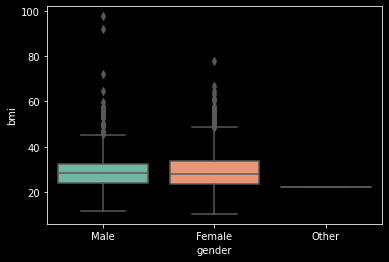

In [7]:
sns.boxplot(x=df['gender'],y=df['bmi'])

<h5>Only <mark>gender</mark> doesn't Inform much about the values<br><br> Let's check age column.</h5>

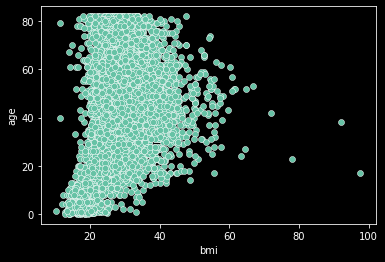

In [8]:
sns.scatterplot(data=df,x='bmi',y='age')

<h5>Only <mark>age</mark> doesn't inform much about the values of bmi.<br><br> We can try grouping the age into toddler teen adult and senior and then impute the bmi values based on the median.</h5>

In [9]:
age_group=[]
for i in df['age']:
    if i<2.0:
        age_group.append('Toddler')
    elif i>2.0 and i<=19.0:
        age_group.append('Teen')
    elif i>19.0 and i<60.0:
        age_group.append('Adult')
    else:
        age_group.append('Senior')
df['age_group']=age_group
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Senior
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,Senior
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Senior
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Adult
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Senior


In [10]:
fig = px.box(df, x="age_group", y="bmi",color="gender")
fig.show()

In [11]:
def impute_bmi(cols):
    bmi = cols[0]
    age_group = cols[1]
    gender = cols[2]
    if pd.isnull(bmi):
        if age_group == 'Senior':
            if gender == 'Male':
                return 29.0
            else:
                return 28.9
        elif age_group == 'Adult':
            if gender == 'Male':
                return 30.2
            else:
                return 28.8
        elif age_group == 'Teen':
            if gender == 'Male':
                return 20.6
            else:
                return 21.8
        else:
            if gender == 'Male':
                return 18.9
            else:
                return 18.05
    else:
        return bmi
df['bmi']=df[['bmi','age_group','gender']].apply(impute_bmi,axis=1)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Senior
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.9,never smoked,1,Senior
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Senior
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Adult
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Senior


In [12]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
age_group            0
dtype: int64

<h5>The dataset is now clean. Let's dig into some more info about the data.</h5>

<h1><b>3 <span style='color:#f34e26'>|</span> EDA</b></h1>

In [13]:
df.shape

(5110, 13)

In [14]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.871027,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.718561,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.625000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.300000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
 12  age_group          5110 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 519.1+ KB


In [16]:
# To check for duplicates
df.duplicated().sum()

0

In [17]:
#storing categorical and continuous columns into separate lists for future purpose
con_cols=['age','avg_glucose_level','bmi']
cat_cols=[]
for i in df.columns:
    if i!='id' and i!='stroke' and i not in con_cols:
        cat_cols.append(i)
cat_cols

['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status',
 'age_group']

In [18]:
#Checking value in each categorical column
cat_cols.append('age_group')
for i in cat_cols:
    print(f'============Values in {i}============\n{df[i].value_counts()}\n------------------------')

============Values in gender============
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
------------------------
============Values in hypertension============
0    4612
1     498
Name: hypertension, dtype: int64
------------------------
============Values in heart_disease============
0    4834
1     276
Name: heart_disease, dtype: int64
------------------------
============Values in ever_married============
Yes    3353
No     1757
Name: ever_married, dtype: int64
------------------------
============Values in work_type============
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
------------------------
============Values in Residence_type============
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
------------------------
============Values in smoking_status============
never smoked       1892
Unknown            1544
formerly smoked     885
smokes        

<h5>Only one instance of gender Other is found. Let's remove it.</h5>

In [19]:
df.drop(index = df[df['gender']=='Other'].index[0] ,axis=0,inplace=True)

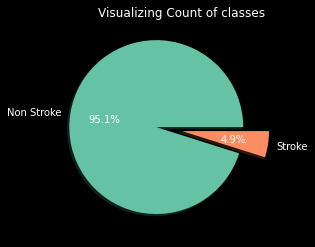

In [21]:
plt.title("Visualizing Count of classes")
plt.pie(np.array(df['stroke'].value_counts()),labels=['Non Stroke','Stroke'],explode=[0.3,0],autopct='%1.1f%%',shadow=True)
plt.show()

<h4>A huge imbalance of the classes is found! Would oversample the minority class.</h4>

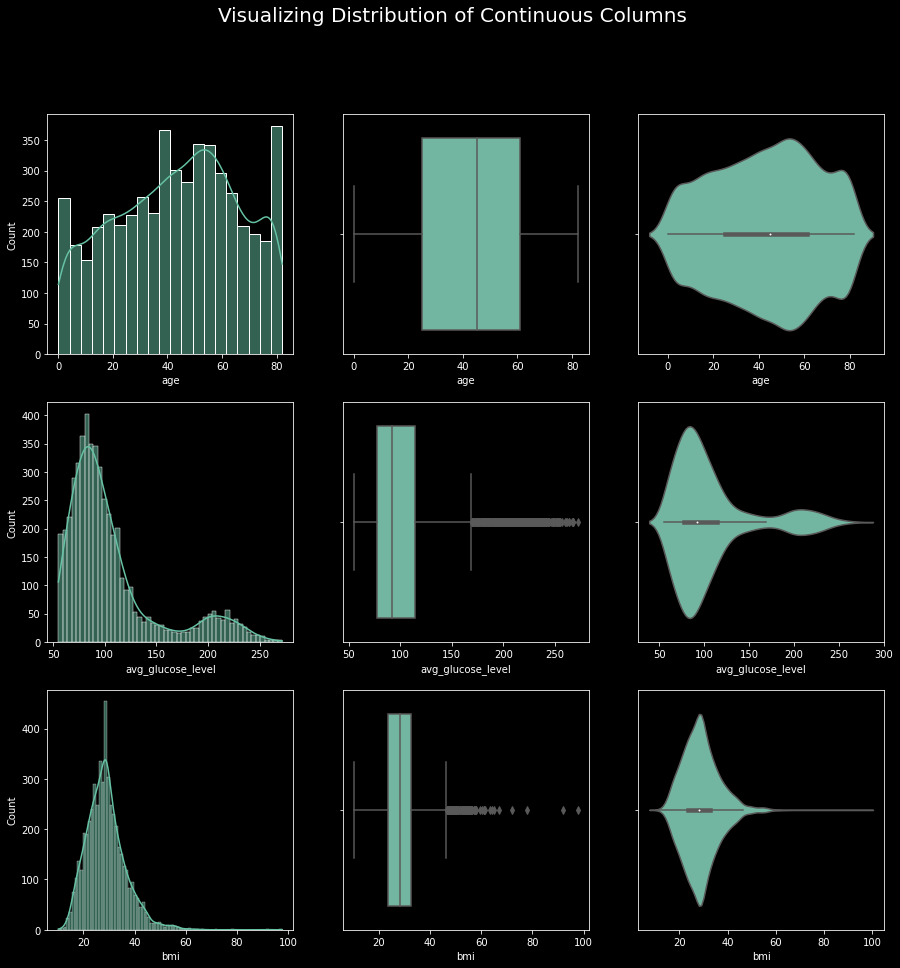

In [22]:
fig,ax=plt.subplots(3,3,figsize=(15,15))
for index,i in enumerate(con_cols):
    plt.suptitle("Visualizing Distribution of Continuous Columns",size=20)
    sns.histplot(df[i],ax=ax[index,0],kde=True)
    sns.boxplot(data=df,x=i,ax=ax[index,1])
    sns.violinplot(data=df,x=i,ax=ax[index,2])

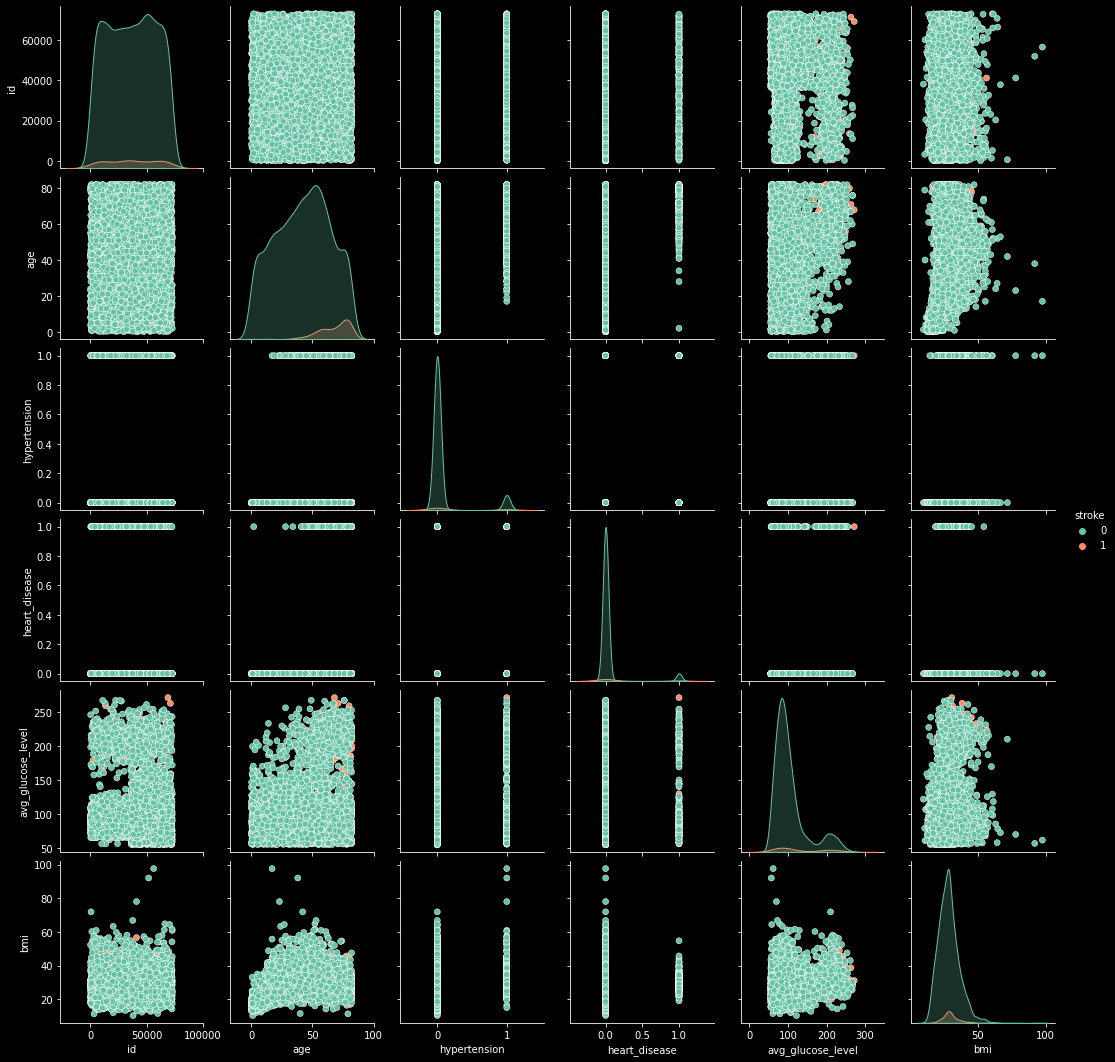

In [23]:
sns.pairplot(data=df,hue='stroke')

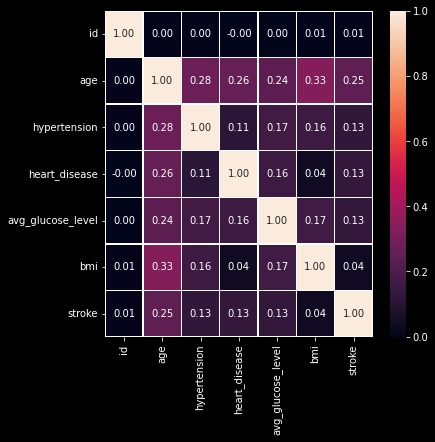

In [24]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,fmt='0.2f')
plt.show()

<h5>Not much correlation between independent variables.</h5>

<h1><b>4 <span style='color:#f34e26'>|</span> Data Preprocessing</b></h1>

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#2b2b2b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Encoding of Categorical columns</b></p>
</div>

In [25]:
cat_cols.pop()
df_enc=pd.get_dummies(df[cat_cols],drop_first=True)
df_enc.head()

,hypertension,heart_disease,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age_group_Senior,age_group_Teen,age_group_Toddler
0,0,1,1,1,0,1,0,0,1,1,0,0,1,0,0
1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0
2,0,1,1,1,0,1,0,0,0,0,1,0,1,0,0
3,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0
4,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0


In [26]:
df[df_enc.columns]=df_enc
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age_group_Senior,age_group_Teen,age_group_Toddler
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,...,1,0,0,1,1,0,0,1,0,0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.9,...,0,1,0,0,0,1,0,1,0,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,...,1,0,0,0,0,1,0,1,0,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,...,1,0,0,1,0,0,1,0,0,0
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,...,0,1,0,0,0,1,0,1,0,0


In [27]:
df.drop(cat_cols,axis=1,inplace=True)
df.head()

,id,age,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age_group_Senior,age_group_Teen,age_group_Toddler
0,9046,67.0,228.69,36.6,1,1,1,0,1,0,0,1,1,0,0,1,0,0
1,51676,61.0,202.21,28.9,1,0,1,0,0,1,0,0,0,1,0,1,0,0
2,31112,80.0,105.92,32.5,1,1,1,0,1,0,0,0,0,1,0,1,0,0
3,60182,49.0,171.23,34.4,1,0,1,0,1,0,0,1,0,0,1,0,0,0
4,1665,79.0,174.12,24.0,1,0,1,0,0,1,0,0,0,1,0,1,0,0


In [29]:
df_final=df.drop(['id','age'],axis=1)
df_final.head()

,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age_group_Senior,age_group_Teen,age_group_Toddler
0,228.69,36.6,1,1,1,0,1,0,0,1,1,0,0,1,0,0
1,202.21,28.9,1,0,1,0,0,1,0,0,0,1,0,1,0,0
2,105.92,32.5,1,1,1,0,1,0,0,0,0,1,0,1,0,0
3,171.23,34.4,1,0,1,0,1,0,0,1,0,0,1,0,0,0
4,174.12,24.0,1,0,1,0,0,1,0,0,0,1,0,1,0,0


 | Oversampling of Minority Class</b></p>
</div>

In [30]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X=df_final.drop(['stroke'],axis=1)
y=df_final['stroke']
X_over, y_over = oversample.fit_resample(X, y)

| Splitting into train and test set</b></p>
</div>

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_over,y_over,test_size=0.3,stratify=y_over,random_state=42)

Scaling of numerical columns</b></p>
</div>

<h1><b>5 <span style='color:#f34e26'>|</span> Model Building</b></h1>

 KNearest Neighbors - 97% acc</b></p>
</div>

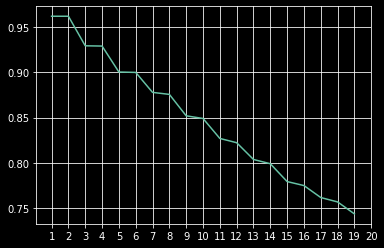

In [33]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
knn_scores=[]
for k in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X_train,y_train,cv=5)
    knn_scores.append(scores.mean())

x_ticks = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
x_labels = x_ticks

plt.plot([k for k in range(1,20)],knn_scores)
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.grid()

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1458
           1       0.94      1.00      0.97      1458

    accuracy                           0.97      2916
   macro avg       0.97      0.97      0.97      2916
weighted avg       0.97      0.97      0.97      2916



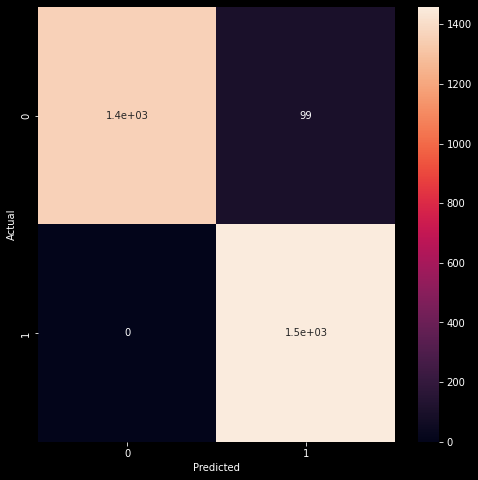

In [34]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
from sklearn.metrics import confusion_matrix
confusion_knn=confusion_matrix(y_test,knn.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_knn,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
from sklearn.metrics import classification_report
print(classification_report(y_test,knn.predict(X_test)))

We achieved accuracy of 97%.

<h1><b>7 <span style='color:#f34e26'>|</span> Future Aspect</b></h1>

#### In my upcoming versions I would try to remove outliers and then again re- train models to check any decrease in mis-classifications.